##Credit card fraudlant predictor



#group names:
# Aissa Zouhayr
# Arezouma Ngobo

## credit card fraud detector

Content

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

link to data https://www.kaggle.com/mlg-ulb/creditcardfraud/downloads/creditcardfraud.zip/3

Task: the data is umbalanced so we will subsample (using under and over sampling) and train the model with it
then we test the models using the original data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [3]:
print(data.shape)

(284807, 31)


In [4]:
# features exploration 
#It contains only numerical input variables which are the result 
#of a PCA transformation. Unfortunately, due to confidentiality issues,
#we cannot provide the original features and more background information
#about the data. Features V1, V2, ... V28 are the principal components
#obtained with PCA, the only features which have 
#not been transformed with PCA are 'Time' and 'Amount'.

#TimeNumber of seconds elapsed between this transaction and the first transaction in the dataset
#V1 may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)
#V2 => V27 V28abc
#AmountTransaction amount
#Class 1 for fraudulent transactions, 0 otherwise

In [5]:
# checking for missing values
c= data.columns
print(c)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
for d in range(len(c)):
    
    print(c[d], " nulls are: ", data[c[d]].isnull().sum())
    

Time  nulls are:  0
V1  nulls are:  0
V2  nulls are:  0
V3  nulls are:  0
V4  nulls are:  0
V5  nulls are:  0
V6  nulls are:  0
V7  nulls are:  0
V8  nulls are:  0
V9  nulls are:  0
V10  nulls are:  0
V11  nulls are:  0
V12  nulls are:  0
V13  nulls are:  0
V14  nulls are:  0
V15  nulls are:  0
V16  nulls are:  0
V17  nulls are:  0
V18  nulls are:  0
V19  nulls are:  0
V20  nulls are:  0
V21  nulls are:  0
V22  nulls are:  0
V23  nulls are:  0
V24  nulls are:  0
V25  nulls are:  0
V26  nulls are:  0
V27  nulls are:  0
V28  nulls are:  0
Amount  nulls are:  0
Class  nulls are:  0


In [7]:
data.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


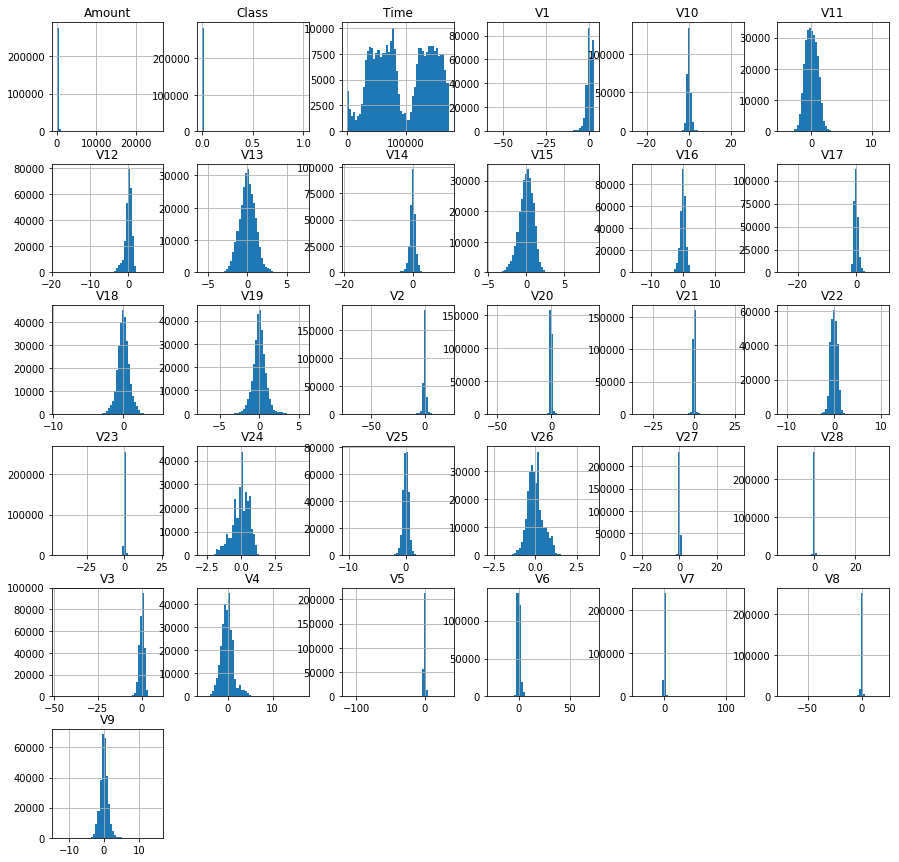

In [8]:
# graphical distribution of data
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(15,15))
plt.show()

In [9]:
#Use .corr() to display the standard correlation coefficient between rank value and each input feature.
#Use pandas.plotting.scatter_matrix() to visualize the correlation.
#Correlation coefficient ranges from -1 to 1.
#When it is close to 1, it means that there is a strong positive correlation.
#When it is close to -1, it means that there is a strong negative correlation.
#When it is close to zero, it means that there is no linear correlation (other correlation may still exist


In [10]:
data.corr()['Class'].sort_values(ascending=False)
# from data below we see that it is hard to see correlations between featues and classes

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [11]:
# take a look at the class distribution
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')
# the data is Umbalanced as seen from results below we need to solve this problem 
# otherwise the model we will  train we will assume every instance as class 0 no fraud 

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

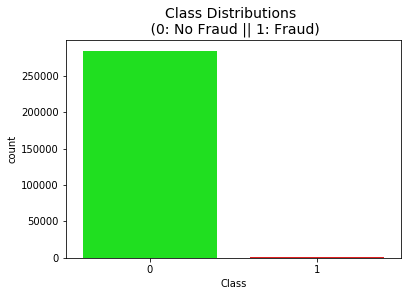

In [12]:
colors = ["#00ff00", "red"]

sns.countplot('Class', data=data, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [13]:
fraud_indices= np.array(data[data.Class==1].index)
normal_indices = np.array(data[data.Class==0].index)
print(len(fraud_indices))
print(len(normal_indices ))
print(data.shape)

492
284315
(284807, 31)


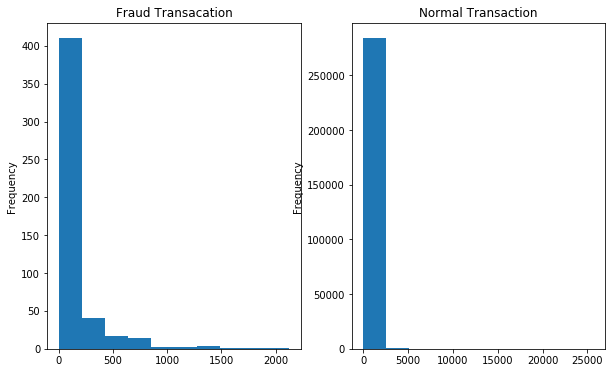

In [14]:
# visualize the data more
# amount feature is expected to be important lets look at its distribution
Fraud_transacation = data[data["Class"]==1]
Normal_transacation= data[data["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation.Amount.plot.hist(title="Fraud Transacation")
plt.subplot(122)
Normal_transacation.Amount.plot.hist(title="Normal Transaction")

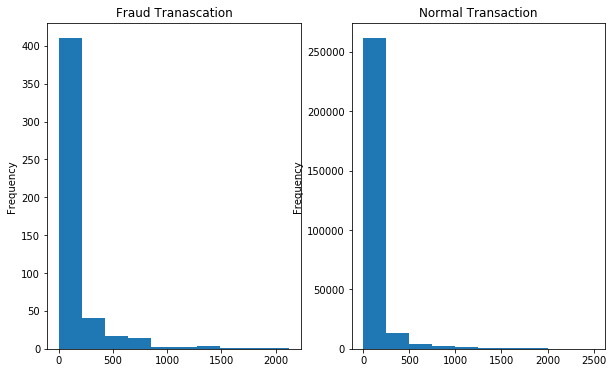

In [15]:
# the distribution for Normal transction is not clear and it seems that all transaction are less than 2.5 K
# So plot graph for same 
Fraud_transacation = data[data["Class"]==1]
Normal_transacation= data[data["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation[Fraud_transacation["Amount"]<= 2500].Amount.plot.hist(title="Fraud Tranascation")
plt.subplot(122)
Normal_transacation[Normal_transacation["Amount"]<=2500].Amount.plot.hist(title="Normal Transaction")

In [16]:
# lets scale amount and time features
from sklearn.preprocessing import StandardScaler
data["Scaled Amount"] = StandardScaler().fit_transform(np.array(data['Amount']).reshape(-1, 1))
data["Scaled Time"] = StandardScaler().fit_transform(np.array(data['Time']).reshape(-1, 1))
data.drop(["Time","Amount"],axis=1,inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled Amount,Scaled Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [17]:
# since the data is umbalanced we can not train the models on it becuase it will overfit and the model will misjudge
# classes as all non fraud. also this unbalanced data will cause wrong correlaltion between features and classes
# we use the sub-sample technique (both under and over sampling) to train the models and test
#them on the original data


## using under-sampling

In [18]:
# under sampling we use the mojority of 0 class and same sizes of 1 class proportions
# lets create three different proportions that we will use for training models
#count  indices in both 0 and 1 classes
fraud_indices= np.array(data[data.Class==1].index)
normal_indices = np.array(data[data.Class==0].index)
# get the datapoints for each class
Fraud_transaction = data[data["Class"]==1]
Normal_transaction= data[data["Class"]==0]
Count_Normal_transaction = len(data[data["Class"]==0]) # normal transaction are repersented by 0
Count_Fraud_transaction = len(data[data["Class"]==1]) # fraud by 1
under_samples =[0,0,0]
for i in range(1,4):
    
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,
                                                            (i*Count_Fraud_transaction),replace=False))
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = data.iloc[undersample_data,:]
    under_samples[i-1] = undersample_data
    print(under_samples[i-1].shape)
  

(984, 31)
(1476, 31)
(1968, 31)


In [19]:
#  a function that will be invoked when we want split each smaple data into train and test sets
from sklearn.model_selection import train_test_split # to split the data
def data_split(d): # preparing data for training and testing as we are going to use different data 
    x_features = d.drop('Class',axis=1)
    x_labels  = d['Class']
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,test_size=0.3)
    print("length of training data")
    print(len(x_features_train))
    print("length of test data")
    print(len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)


In [20]:
# a function to be invoked when we train each model on each sample data
def model(model,features_train,features_test,labels_train,labels_test):
    clf= model
    clf.fit(features_train,labels_train.values.ravel())
    pred=clf.predict(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    fig= plt.figure(figsize=(6,3))# to plot the graph
    print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
    print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
    print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
    print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))

In [21]:
# take final look at the data we have

In [22]:
print('original data')
print(data.shape)
data.head()


original data
(284807, 31)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled Amount,Scaled Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [23]:
# the under sampled data
for i in range(3):
    print('proportion',i+1)
    data_split(under_samples[i])


proportion 1
length of training data
688
length of test data
296
proportion 2
length of training data
1033
length of test data
443
proportion 3
length of training data
1377
length of test data
591


 # Building models¶

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report

## Logistic Regression with Undersample Data


 PROPORTION 1

length of training data
688
length of test data
296
the recall for this model is : 0.8835616438356164
TP 129
TN 146
FP 4
FN 17


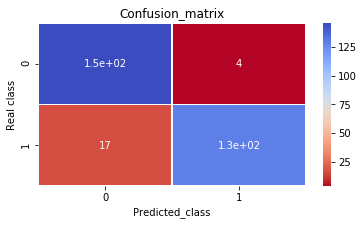


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       150
           1       0.97      0.88      0.92       146

   micro avg       0.93      0.93      0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296

________________________________________________________________________________________________________
 PROPORTION 2

length of training data
1033
length of test data
443
the recall for this model is : 0.8680555555555556
TP 125
TN 295
FP 4
FN 19


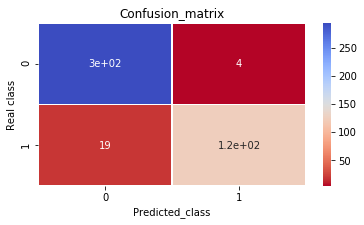


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       299
           1       0.97      0.87      0.92       144

   micro avg       0.95      0.95      0.95       443
   macro avg       0.95      0.93      0.94       443
weighted avg       0.95      0.95      0.95       443

________________________________________________________________________________________________________
 PROPORTION 3

length of training data
1377
length of test data
591
the recall for this model is : 0.8723404255319149
TP 123
TN 445
FP 5
FN 18


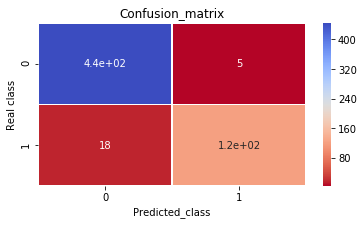


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       450
           1       0.96      0.87      0.91       141

   micro avg       0.96      0.96      0.96       591
   macro avg       0.96      0.93      0.94       591
weighted avg       0.96      0.96      0.96       591

________________________________________________________________________________________________________


In [25]:
for i in range(3):  
    print(' PROPORTION', i+1 )
    print()
    clf=LogisticRegression(solver='lbfgs')
    undersample_features_train,undersample_features_test,undersample_labels_train,\
    undersample_labels_test=data_split(under_samples[i])
    model(clf,undersample_features_train,undersample_features_test,\
          undersample_labels_train,undersample_labels_test)
    print("________________________________________________________________________________________________________")

In [26]:
 # from data above As the number of normal transaction is increasing the recall for fraud transcation is decreasing
#TP = no of fraud transaction which are predicted fraud
#TN = no. of normal transaction which are predicted normal
#FP = no of normal transaction which are predicted fraud
#FN =no of fraud Transaction which are predicted normal 
        
        

 PROPORTION 1

length of training data
688
length of test data
296
length of training data
199364
length of test data
85443
the recall for this model is : 0.8866666666666667
TP 133
TN 82980
FP 2313
FN 17


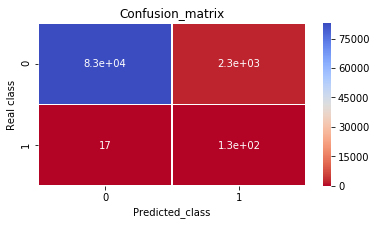


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85293
           1       0.05      0.89      0.10       150

   micro avg       0.97      0.97      0.97     85443
   macro avg       0.53      0.93      0.54     85443
weighted avg       1.00      0.97      0.98     85443

________________________________________________________________________________________________________
 PROPORTION 2

length of training data
1033
length of test data
443
length of training data
199364
length of test data
85443
the recall for this model is : 0.9
TP 144
TN 84010
FP 1273
FN 16


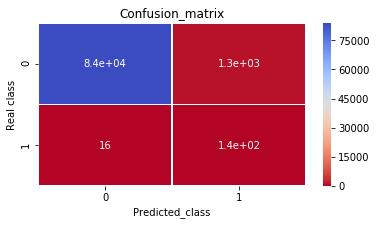


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85283
           1       0.10      0.90      0.18       160

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.55      0.94      0.59     85443
weighted avg       1.00      0.98      0.99     85443

________________________________________________________________________________________________________
 PROPORTION 3

length of training data
1377
length of test data
591
length of training data
199364
length of test data
85443
the recall for this model is : 0.9148936170212766
TP 129
TN 84463
FP 839
FN 12


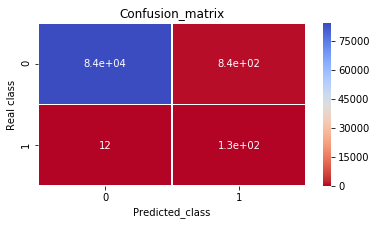


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85302
           1       0.13      0.91      0.23       141

   micro avg       0.99      0.99      0.99     85443
   macro avg       0.57      0.95      0.61     85443
weighted avg       1.00      0.99      0.99     85443

________________________________________________________________________________________________________


In [27]:
#let us train this model using undersample data and test for the whole data test set 
for i in range(3):  
    print(' PROPORTION', i+1 )
    print()
    clf=LogisticRegression(solver='lbfgs')
    undersample_features_train,undersample_features_test,undersample_labels_train\
    ,undersample_labels_test=data_split(under_samples[i])
    data_features_train,data_features_test,data_labels_train,data_labels_test=data_split(data) 
    model(clf,undersample_features_train,data_features_test,undersample_labels_train,data_labels_test)
    print("________________________________________________________________________________________________________")

In [28]:
# the recall and precision using original data are following the same in under sampled data
# but preciiosn is low so we need a model  with good precision (high recall and low preciosn mean
# that we are catching fraud transaction well but low precision means we are catching inocent transactions also)
# so lets train another models

## SVM 

 PROPORTION 1

length of training data
688
length of test data
296
the recall for this model is : 0.9097222222222222
TP 131
TN 143
FP 9
FN 13


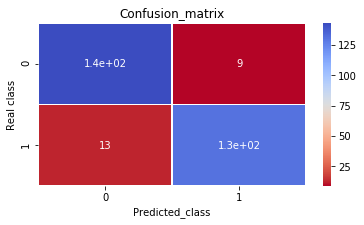


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       152
           1       0.94      0.91      0.92       144

   micro avg       0.93      0.93      0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296

________________________________________________________________________________________________________
 PROPORTION 2

length of training data
1033
length of test data
443
the recall for this model is : 0.9225352112676056
TP 131
TN 290
FP 11
FN 11


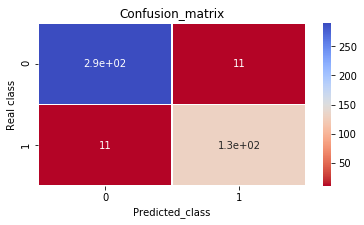


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       301
           1       0.92      0.92      0.92       142

   micro avg       0.95      0.95      0.95       443
   macro avg       0.94      0.94      0.94       443
weighted avg       0.95      0.95      0.95       443

________________________________________________________________________________________________________
 PROPORTION 3

length of training data
1377
length of test data
591
the recall for this model is : 0.9084507042253521
TP 129
TN 441
FP 8
FN 13


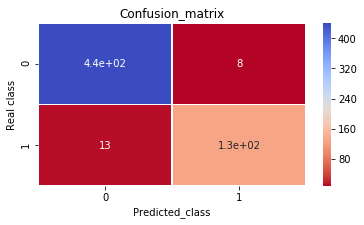


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       449
           1       0.94      0.91      0.92       142

   micro avg       0.96      0.96      0.96       591
   macro avg       0.96      0.95      0.95       591
weighted avg       0.96      0.96      0.96       591

________________________________________________________________________________________________________


In [29]:
for i in range(3):  
    print(' PROPORTION', i+1 )
    print()
    clf=SVC(gamma='auto')
    undersample_features_train,undersample_features_test,undersample_labels_train,\
    undersample_labels_test=data_split(under_samples[i])
    model(clf,undersample_features_train,undersample_features_test,\
          undersample_labels_train,undersample_labels_test)
    print("________________________________________________________________________________________________________")

 PROPORTION 1

length of training data
688
length of test data
296
length of training data
199364
length of test data
85443
the recall for this model is : 0.9612903225806452
TP 149
TN 80195
FP 5093
FN 6


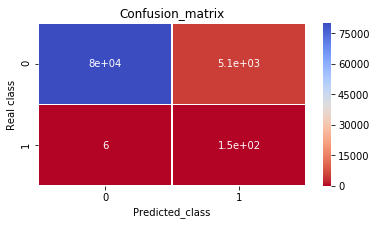


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     85288
           1       0.03      0.96      0.06       155

   micro avg       0.94      0.94      0.94     85443
   macro avg       0.51      0.95      0.51     85443
weighted avg       1.00      0.94      0.97     85443

________________________________________________________________________________________________________
 PROPORTION 2

length of training data
1033
length of test data
443
length of training data
199364
length of test data
85443
the recall for this model is : 0.9395973154362416
TP 140
TN 82418
FP 2876
FN 9


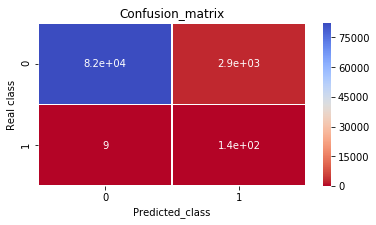


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85294
           1       0.05      0.94      0.09       149

   micro avg       0.97      0.97      0.97     85443
   macro avg       0.52      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443

________________________________________________________________________________________________________
 PROPORTION 3

length of training data
1377
length of test data
591
length of training data
199364
length of test data
85443
the recall for this model is : 0.8924050632911392
TP 141
TN 83485
FP 1800
FN 17


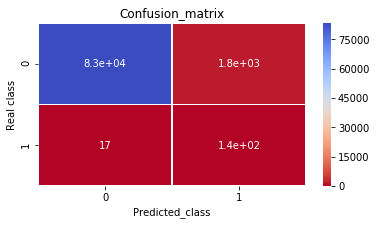


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85285
           1       0.07      0.89      0.13       158

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.54      0.94      0.56     85443
weighted avg       1.00      0.98      0.99     85443

________________________________________________________________________________________________________


In [30]:
# SVM precison and recall are almost same as Logistic regression
#let us train this model using undersample data and test for the whole data test set 
for i in range(3):  
    print(' PROPORTION', i+1 )
    print()
    clf=SVC(gamma='auto')
    undersample_features_train,undersample_features_test,undersample_labels_train\
    ,undersample_labels_test=data_split(under_samples[i])
    data_features_train,data_features_test,data_labels_train,data_labels_test=data_split(data) 
    model(clf,undersample_features_train,data_features_test,undersample_labels_train,data_labels_test)
    print("________________________________________________________________________________________________________")

In [31]:
# still precison is low for SVM

## Random Forest Classifie

 PROPORTION 1

length of training data
688
length of test data
296
the recall for this model is : 0.8866666666666667
TP 133
TN 140
FP 6
FN 17


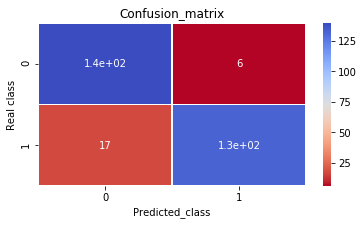


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       146
           1       0.96      0.89      0.92       150

   micro avg       0.92      0.92      0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296

________________________________________________________________________________________________________
 PROPORTION 2

length of training data
1033
length of test data
443
the recall for this model is : 0.8543046357615894
TP 129
TN 291
FP 1
FN 22


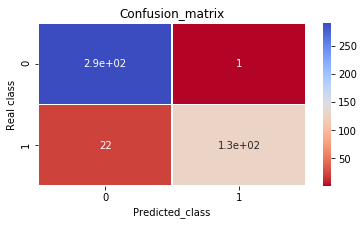


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       292
           1       0.99      0.85      0.92       151

   micro avg       0.95      0.95      0.95       443
   macro avg       0.96      0.93      0.94       443
weighted avg       0.95      0.95      0.95       443

________________________________________________________________________________________________________
 PROPORTION 3

length of training data
1377
length of test data
591
the recall for this model is : 0.8545454545454545
TP 141
TN 426
FP 0
FN 24


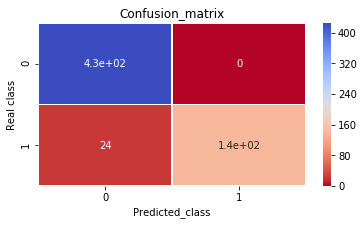


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       426
           1       1.00      0.85      0.92       165

   micro avg       0.96      0.96      0.96       591
   macro avg       0.97      0.93      0.95       591
weighted avg       0.96      0.96      0.96       591

________________________________________________________________________________________________________


In [32]:
for i in range(3):  
    print(' PROPORTION', i+1 )
    print()
    clf= RandomForestClassifier(n_estimators=100)# here we are just changing classifier
    undersample_features_train,undersample_features_test,undersample_labels_train,\
    undersample_labels_test=data_split(under_samples[i])
    model(clf,undersample_features_train,undersample_features_test,\
          undersample_labels_train,undersample_labels_test)
    print("________________________________________________________________________________________________________")

In [33]:
# precision improved for 3 proportions with  Random Forest Classifier

 PROPORTION 1

length of training data
688
length of test data
296
length of training data
199364
length of test data
85443
the recall for this model is : 0.9662162162162162
TP 143
TN 83606
FP 1689
FN 5


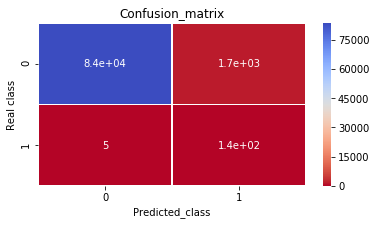


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.08      0.97      0.14       148

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.54      0.97      0.57     85443
weighted avg       1.00      0.98      0.99     85443

________________________________________________________________________________________________________
 PROPORTION 2

length of training data
1033
length of test data
443
length of training data
199364
length of test data
85443
the recall for this model is : 0.9379310344827586
TP 136
TN 84598
FP 700
FN 9


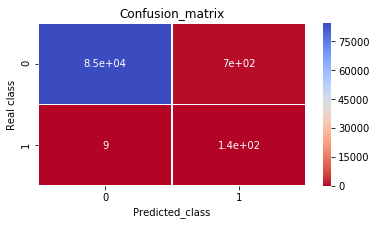


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85298
           1       0.16      0.94      0.28       145

   micro avg       0.99      0.99      0.99     85443
   macro avg       0.58      0.96      0.64     85443
weighted avg       1.00      0.99      0.99     85443

________________________________________________________________________________________________________
 PROPORTION 3

length of training data
1377
length of test data
591
length of training data
199364
length of test data
85443
the recall for this model is : 0.9724137931034482
TP 141
TN 84819
FP 479
FN 4


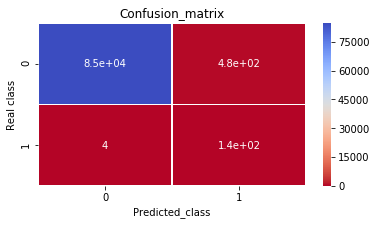


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85298
           1       0.23      0.97      0.37       145

   micro avg       0.99      0.99      0.99     85443
   macro avg       0.61      0.98      0.68     85443
weighted avg       1.00      0.99      1.00     85443

________________________________________________________________________________________________________


In [69]:
# 
#let us train this model using undersample data and test for the whole data test set 
for i in range(3):  
    print(' PROPORTION', i+1 )
    print()
    clf= RandomForestClassifier(n_estimators=100)# here we are just changing classifier
    undersample_features_train,undersample_features_test,undersample_labels_train\
    ,undersample_labels_test=data_split(under_samples[i])
    data_features_train,data_features_test,data_labels_train,data_labels_test=data_split(data) 
    model(clf,undersample_features_train,data_features_test,undersample_labels_train,data_labels_test)
    print("________________________________________________________________________________________________________")

In [35]:
##precision for Random Forest Classifier increased now .23 in the third part as we used real data for testing
# but still precision is low 

In [36]:
# lets use faetures that are important in dataset

# this is the property of Random Forest classifier that it provides us the importance 
# of the features use
# imoprtance is shown by values from top down and v14 is the main one
featimp = pd.Series(clf.feature_importances_,index=data_features_train.columns).sort_values(ascending=False)
print(featimp) 

V10              0.171020
V14              0.161435
V17              0.117589
V11              0.072233
V16              0.072158
V4               0.068980
V12              0.052257
V3               0.047970
V7               0.041746
V2               0.027026
V18              0.023171
V27              0.015773
V21              0.014159
V1               0.013125
V9               0.009678
Scaled Amount    0.009582
V19              0.009132
V20              0.007571
V13              0.006992
V15              0.006862
V8               0.006631
V22              0.005904
V28              0.005397
V5               0.005372
V26              0.005211
V6               0.005079
V23              0.005034
Scaled Time      0.004901
V25              0.004011
V24              0.004002
dtype: float64


In [37]:
# make a new data with only class and V14
data1=data[["V14","V10","V12","V17","V11","Class"]]
data1.head()

,V14,V10,V12,V17,V11,Class
0,-0.311169,0.090794,-0.617801,0.207971,-0.551600,0
1,-0.143772,-0.166974,1.065235,-0.114805,1.612727,0
2,-0.165946,0.207643,0.066084,1.109969,0.624501,0
3,-0.287924,-0.054952,0.178228,-0.684093,-0.226487,0
4,-1.119670,0.753074,0.538196,-0.237033,-0.822843,0


In [38]:
# lets use only some features and train the Random Forest Classifier only on proprtion 1 where fraud and 
# non fraud are equally 50%
#count  indices in both 0 and 1 classes
fraud_indices= np.array(data[data.Class==1].index)
normal_indices = np.array(data[data.Class==0].index)
# get the datapoints for each class
Fraud_transaction = data[data["Class"]==1]
Normal_transaction= data[data["Class"]==0]
Count_Normal_transaction = len(data[data["Class"]==0]) # normal transaction are repersented by 0
Count_Fraud_transaction = len(data[data["Class"]==1]) # fraud by 1
Normal_indices_undersample = np.array(np.random.choice(normal_indices,                                                           (1*Count_Fraud_transaction),replace=False))
undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
undersample_data = data.iloc[undersample_data,:]
Undersample_data1 = undersample_data
Undersample_data1_features_train,Undersample_data1_features_test,Undersample_data1_labels_train,\
Undersample_data1_labels_test = data_split(Undersample_data1)

length of training data
688
length of test data
296


the recall for this model is : 0.92
TP 138
TN 141
FP 5
FN 12


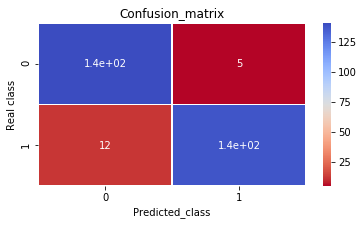


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       146
           1       0.97      0.92      0.94       150

   micro avg       0.94      0.94      0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



In [39]:
# train the model on the three new proportions from  data1
clf= RandomForestClassifier(n_estimators=100)
model(clf,Undersample_data1_features_train,Undersample_data1_features_test\
      ,Undersample_data1_labels_train,Undersample_data1_labels_test)

In [40]:
# preciosn is high now and recall also
# lets train this model also on using the 3 proportions but on new data clled data1  with only features
# "V14","V10","V12","V17","V11","Class"
# lets try the three proportions 

In [41]:
# cretes the three proportions 
# under smapling we use the mojority of 0 class and same sizes of 1 class proportions
# lets create three different proportions that we will use for training models
#count  indices in both 0 and 1 classes
fraud_indices= np.array(data1[data1.Class==1].index)
normal_indices = np.array(data1[data1.Class==0].index)
# get the datapoints for each class
Fraud_transaction = data1[data1["Class"]==1]
Normal_transaction= data1[data1["Class"]==0]
Count_Normal_transaction = len(data1[data1["Class"]==0]) # normal transaction are repersented by 0
Count_Fraud_transaction = len(data1[data1["Class"]==1]) # fraud by 1
under_sample =[0,0,0]
for i in range(1,4):
    
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,
                                                            (i*Count_Fraud_transaction),replace=False))
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = data1.iloc[undersample_data,:]
    under_sample[i-1] = undersample_data
    print(under_sample[i-1].shape)
  

(984, 6)
(1476, 6)
(1968, 6)


 PROPORTION 1

length of training data
688
length of test data
296
the recall for this model is : 0.8903225806451613
TP 138
TN 138
FP 3
FN 17


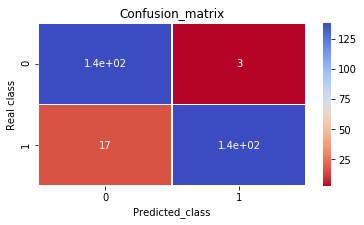


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       141
           1       0.98      0.89      0.93       155

   micro avg       0.93      0.93      0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.94      0.93      0.93       296

________________________________________________________________________________________________________
 PROPORTION 2

length of training data
1033
length of test data
443
the recall for this model is : 0.8671328671328671
TP 124
TN 293
FP 7
FN 19


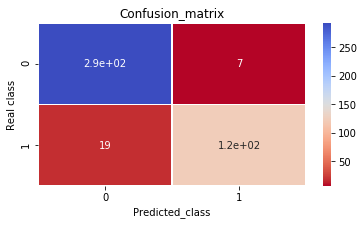


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       300
           1       0.95      0.87      0.91       143

   micro avg       0.94      0.94      0.94       443
   macro avg       0.94      0.92      0.93       443
weighted avg       0.94      0.94      0.94       443

________________________________________________________________________________________________________
 PROPORTION 3

length of training data
1377
length of test data
591
the recall for this model is : 0.8620689655172413
TP 125
TN 443
FP 3
FN 20


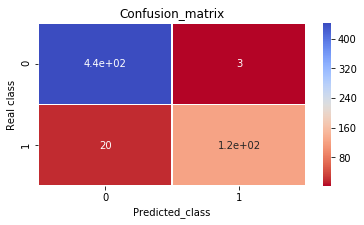


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       446
           1       0.98      0.86      0.92       145

   micro avg       0.96      0.96      0.96       591
   macro avg       0.97      0.93      0.95       591
weighted avg       0.96      0.96      0.96       591

________________________________________________________________________________________________________


In [42]:

for i in range(3):  
    print(' PROPORTION', i+1 )
    print()
    clf= RandomForestClassifier(n_estimators=100)# here we are just changing classifier
    undersample_features_train,undersample_features_test,undersample_labels_train,\
    undersample_labels_test=data_split(under_sample[i])
    model(clf,undersample_features_train,undersample_features_test,\
          undersample_labels_train,undersample_labels_test)
    print("________________________________________________________________________________________________________")

In [43]:
# both recall (went down a bit) and preciosn are high

 PROPORTION 1

length of training data
688
length of test data
296
length of training data
199364
length of test data
85443
the recall for this model is : 0.9802631578947368
TP 149
TN 80366
FP 4925
FN 3


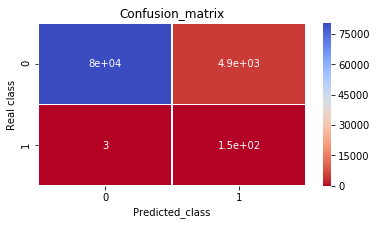


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     85291
           1       0.03      0.98      0.06       152

   micro avg       0.94      0.94      0.94     85443
   macro avg       0.51      0.96      0.51     85443
weighted avg       1.00      0.94      0.97     85443

________________________________________________________________________________________________________
 PROPORTION 2

length of training data
1033
length of test data
443
length of training data
199364
length of test data
85443
the recall for this model is : 0.949685534591195
TP 151
TN 83437
FP 1847
FN 8


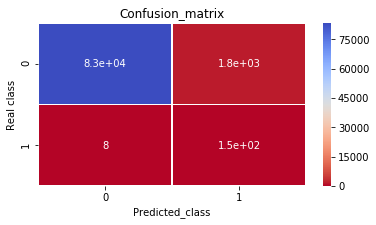


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85284
           1       0.08      0.95      0.14       159

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.54      0.96      0.56     85443
weighted avg       1.00      0.98      0.99     85443

________________________________________________________________________________________________________
 PROPORTION 3

length of training data
1377
length of test data
591
length of training data
199364
length of test data
85443
the recall for this model is : 0.9452054794520548
TP 138
TN 84903
FP 394
FN 8


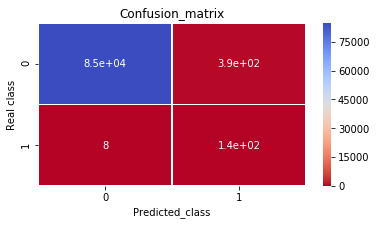


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85297
           1       0.26      0.95      0.41       146

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.63      0.97      0.70     85443
weighted avg       1.00      1.00      1.00     85443

________________________________________________________________________________________________________


In [44]:
#let us train this model using undersample data1 with ["V14","V10","V12","V17","V11","Class"]
#and test for the whole data1 test set 
for i in range(3):  
    print(' PROPORTION', i+1 )
    print()
    clf= RandomForestClassifier(n_estimators=100)# here we are just changing classifier
    undersample_features_train,undersample_features_test,undersample_labels_train\
    ,undersample_labels_test=data_split(under_sample[i])
    newData = data[["V14","V10","V12","V17","V11","Class"]]
    data_features_train,data_features_test,data_labels_train,data_labels_test=data_split(newData) 
    model(clf,undersample_features_train,data_features_test,undersample_labels_train,data_labels_test)
    print("________________________________________________________________________________________________________")

In [45]:
# so even selecting only important features it seems that precision is still low .26
# Lets use Oversampling

# Oversampling

In [46]:

print("length of training data",len(data))

length of training data 284807


In [48]:
# split it 
data_train_X,data_test_X,data_train_y,data_test_y=data_split(data)


length of training data
199364
length of test data
85443


In [49]:
# ok Now we have a traing data
data_train_X["Class"]= data_train_y # combining class with original data
data_train = data_train_X.copy() # for naming conevntion
print("length of training data",len(data_train))
# Now make data set of normal transction and fraud from train data
normal_data = data_train[data_train["Class"]==0]
print("length of normal data",len(normal_data))
fraud_data = data_train[data_train["Class"]==1]
print("length of fraud data",len(fraud_data))

length of training data 199364
length of normal data 199019
length of fraud data 345


In [50]:
# Now start oversampling of training data 
# means we will duplicate many times the value of fraud data
for i in range (len(fraud_data)): 
    normal_data= normal_data.append(fraud_data)
os_data = normal_data.copy() 
print("length of oversampled data is ",len(os_data))
print("Number of normal transcation in oversampled data",len(os_data[os_data["Class"]==0]))
print("No.of fraud transcation",len(os_data[os_data["Class"]==1]))
print("Proportion of Normal data in oversampled data is ",len(os_data[os_data["Class"]==0])/len(os_data))
print("Proportion of fraud data in oversampled data is ",len(os_data[os_data["Class"]==1])/len(os_data))

length of oversampled data is  318044
Number of normal transcation in oversampled data 199019
No.of fraud transcation 119025
Proportion of Normal data in oversampled data is  0.6257593288978883
Proportion of fraud data in oversampled data is  0.3742406711021117


length of training data
222630
length of test data
95414
the recall for this model is : 1.0
TP 35776
TN 59632
FP 6
FN 0


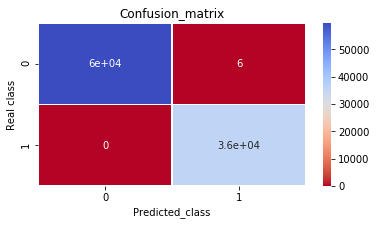


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59638
           1       1.00      1.00      1.00     35776

   micro avg       1.00      1.00      1.00     95414
   macro avg       1.00      1.00      1.00     95414
weighted avg       1.00      1.00      1.00     95414



In [51]:
# Now use this oversampled data for trainig the model and predict value for the test data that we created before
# now let us try within the the oversampled data itself
# for that we need to split our oversampled data into train and test
# so call our function data Prepration with oversampled data
os_train_X,os_test_X,os_train_y,os_test_y=data_split(os_data)
clf= RandomForestClassifier(n_estimators=100)
model(clf,os_train_X,os_test_X,os_train_y,os_test_y)

In [52]:
# precision . and recall are great 
# lets try the model with the test data we created when we did oversampling

In [53]:
# now take all over sampled data as trainging and test it for test data
os_data_X = os_data.drop("Class",axis=1)
os_data_y = os_data["Class"]
data_test_X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Scaled Amount,Scaled Time
51330,-0.874901,0.017575,2.302230,1.123200,0.304286,-0.036237,-0.079758,-0.029002,0.052895,0.081073,...,0.238495,0.860603,0.001767,0.097744,-0.669039,-0.376694,-0.071441,0.051784,-0.185390,-1.051166
102186,-1.484454,1.794425,0.650565,1.208933,-0.627286,-0.511664,-0.146412,0.858116,-0.697067,0.022292,...,0.262860,0.717856,-0.055278,0.409128,-0.169724,-0.196845,0.161567,0.129997,-0.325283,-0.562939
247472,1.996774,-0.080063,-1.089220,1.511589,-0.138826,-0.872713,0.096995,-0.195768,0.896243,0.225997,...,0.155513,0.699730,-0.033307,0.036224,0.390301,-0.371770,0.005389,-0.057139,-0.321245,1.237619
115841,1.203071,0.583489,0.563401,2.367944,0.023106,-0.250442,0.133081,-0.077875,-0.719320,0.664576,...,-0.275246,-0.883341,0.074344,-0.170320,0.314924,-0.236020,-0.008303,0.025358,-0.305292,-0.437454
118120,0.195536,0.748381,1.293379,1.262155,-0.355723,-0.665481,0.390946,-0.041125,0.142932,-0.196697,...,-0.075685,0.007430,0.237072,0.693400,-1.182534,-0.700792,0.244978,0.187668,-0.349231,-0.418144


the recall for this model is : 0.7414965986394558
TP 109
TN 85284
FP 12
FN 38


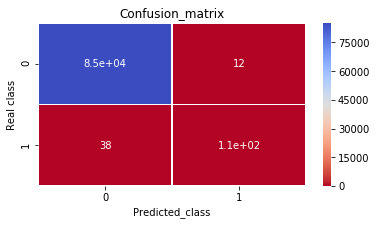


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.90      0.74      0.81       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.95      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [73]:
# now use it for modeling
clf= RandomForestClassifier(n_estimators=100)
model(clf,os_data_X,data_test_X,os_data_y,data_test_y)

In [55]:
# . now we have good precision and recall so we conclude that oversampling is better since undersmapling lead to loss 
# of data because the model judge many normal transcations as no fraus due to low precision

In [56]:
acc= round(clf.score(os_data_X, os_data_y) * 100, 2)
print(acc)

100.0


# Model Selection and Deployment

In [57]:
# we use data obtained from oversampling 
train_set= os_data_X 
train_targets= os_data_y 

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30],
     'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap
    # set as False
    {'bootstrap': [False],
     'n_estimators': [3, 10],
     'max_features': [2, 3, 4]},
  ]
from sklearn.ensemble import RandomForestClassifier
forest_reg = RandomForestClassifier(random_state=42) 
# train across 5 folds, that's a total of
# (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(\
                   forest_reg,
                   param_grid,
                   cv=5,
                   scoring='neg_mean_squared_error',
                   return_train_score=True,
                          )
grid_search.fit(train_set,
                train_targets)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [60]:
# The best hyperparameter combination found:
from sklearn.model_selection import cross_val_score
print('best parameters:', grid_search.best_params_)

# The best model with above parameters
best_model = grid_search.best_estimator_
pred = best_model.predict(train_set)
#print('MSE:', mean_squared_error(pred,
#                                 train_targets))
scores = cross_val_score(best_model,
                          train_set,
                          train_targets,
                          cv=10,
                          scoring="neg_mean_squared_error")
print(scores)

best parameters: {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -6.28831945e-05 -6.28851717e-05 -0.00000000e+00 -3.14425858e-05
 -9.43277575e-05 -0.00000000e+00]


In [61]:
# Randomized search
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

params = {'bootstrap': [True, False],
          'n_estimators': randint(2, 30),
          'max_features': randint(2, 10),}

forest_reg = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(\
                   forest_reg,
                   params,
                   cv=5,
                   scoring='neg_mean_squared_error',
                   return_train_score=True,
                                  )
random_search.fit(train_set,
                  train_targets)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'bootstrap': [True, False], 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a20f586d8>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a20f588d0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=0)

In [62]:
# The best hyperparameter combination found:
print('best parameters:', random_search.best_params_)

# The best model with above parameters
best_model = random_search.best_estimator_
train_pred = best_model.predict(train_set)
#print('MSE:', mean_squared_error(train_pred,
  #                               train_targets))
scores = cross_val_score(best_model,
                          train_set,
                          train_targets,
                          cv=10,
                          scoring="neg_mean_squared_error")
print(scores)

best parameters: {'bootstrap': False, 'max_features': 5, 'n_estimators': 8}
[-0.00000000e+00 -3.14415972e-05 -0.00000000e+00 -0.00000000e+00
 -9.43247917e-05 -6.28851717e-05 -0.00000000e+00 -3.14425858e-05
 -9.43277575e-05 -0.00000000e+00]


In [63]:
# Analyze the best model
feature_importance = best_model.feature_importances_
attributes = train_set.columns
sorted(zip(feature_importance, attributes),
       reverse=True)

[(0.4112344504482578, 'V14'),
 (0.10432600324025951, 'V17'),
 (0.09853635661785894, 'V4'),
 (0.09317369760769766, 'V11'),
 (0.0799673175475097, 'V7'),
 (0.029605109367643153, 'V12'),
 (0.02908951746162104, 'V10'),
 (0.012477283373442893, 'Scaled Amount'),
 (0.00978165548679754, 'V13'),
 (0.009595940289459263, 'V23'),
 (0.008824439532861064, 'V19'),
 (0.008659930302389046, 'V16'),
 (0.008341586094824372, 'V9'),
 (0.008174609207430824, 'V3'),
 (0.008016040266300706, 'V22'),
 (0.0075639887908855495, 'V18'),
 (0.007389350690853251, 'V6'),
 (0.0068823802171548085, 'V15'),
 (0.006868036322655982, 'V5'),
 (0.0067787735499525974, 'V1'),
 (0.006556975731435542, 'V20'),
 (0.006477908430709595, 'V26'),
 (0.005268783429913555, 'V25'),
 (0.004975232350149802, 'V2'),
 (0.004633774127718962, 'Scaled Time'),
 (0.004013555470005497, 'V24'),
 (0.003612606583379717, 'V8'),
 (0.0034959783667993477, 'V21'),
 (0.002970309292932951, 'V28'),
 (0.0027084098010993086, 'V27')]

In [65]:
# evaluation on test set  and train test

from sklearn.metrics import mean_squared_error
# Evaluation the model on test set
test_pred1 = best_model.predict(os_test_X)
best_mseonValidation = mean_squared_error( os_test_y,  
                              test_pred1)

test_pred = best_model.predict(train_set)
best_mseOnTrainSet= mean_squared_error( train_targets,  
                              test_pred)
acc= round(clf.score(os_data_X, os_data_y) * 100, 2)
print('The model accuracy',acc)
print('MSE on best_mseOn test set:', best_mseonValidation)
print('MSE on best_mse train set:', best_mseOnTrainSet)

The model accuracy 100.0
MSE on best_mseOn test set: 0.0
MSE on best_mse train set: 0.0


In [ ]:
#conclusion
# the acurracy is high, the idea of using sub-samplying workde fine for oversmapling as it clear where the precision 
# improved tremdousley over 90%. undersampling did not work for fine for precision and this could be because there  
# was big loss of information specifically the model classified a lot of normal transcation as fraud (low precision)